In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stat
import scikit_posthocs as sp

In [33]:
data = pd.read_csv('Preliminary Processed Data.csv')

In [34]:
data.columns

Index(['Type', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Salary Min', 'Salary Max', 'Salary Avg', 'Location City',
       'Location State', 'Headquarter State', 'Period', 'Competitors Count'],
      dtype='object')

In [35]:
data.head()

,Type,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Competitors,Easy Apply,Salary Min,Salary Max,Salary Avg,Location City,Location State,Headquarter State,Period,Competitors Count
0,Data Scientist,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,...,-1,-1,111.0,181.0,146.0,New York,NY,Canada,13,2
1,Data Scientist,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",1001 to 5000 employees,2008,...,-1,-1,111.0,181.0,146.0,New York,NY,NY,12,2
2,Data Scientist,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,...,-1,1,111.0,181.0,146.0,New York,NY,NY,-1,2
3,Data Scientist,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,...,"Zocdoc, Healthgrades",-1,111.0,181.0,146.0,Lyndhurst,NJ,NJ,1,20
4,Data Scientist,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",51 to 200 employees,2007,...,"BBDO, Grey Group, Droga5",-1,111.0,181.0,146.0,New York,NY,NY,13,24


# 1.按照職缺類型區分
各類型職業的薪資範圍/平均薪資是否有顯著差異?

<AxesSubplot:xlabel='Salary Max', ylabel='Type'>

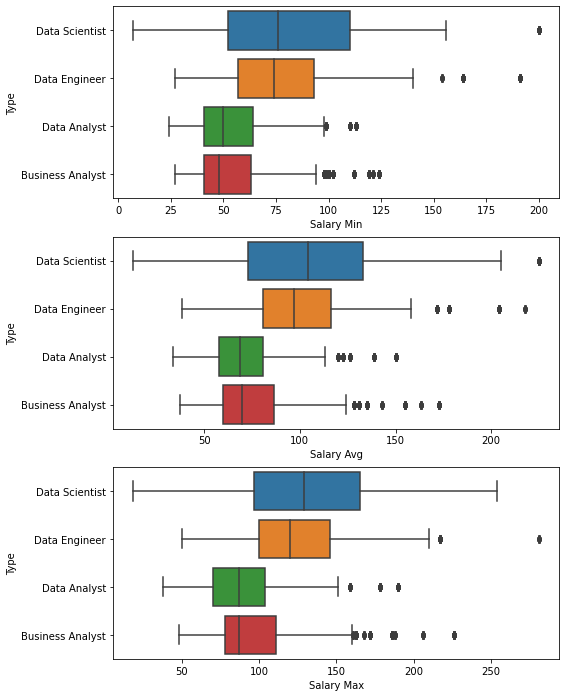

In [447]:
f, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
sns.boxplot(data=data, x="Salary Min", y="Type", ax=axes[0])
sns.boxplot(data=data, x="Salary Avg", y="Type", ax=axes[1])
sns.boxplot(data=data, x="Salary Max", y="Type", ax=axes[2])

<AxesSubplot:xlabel='Salary Max', ylabel='Count'>

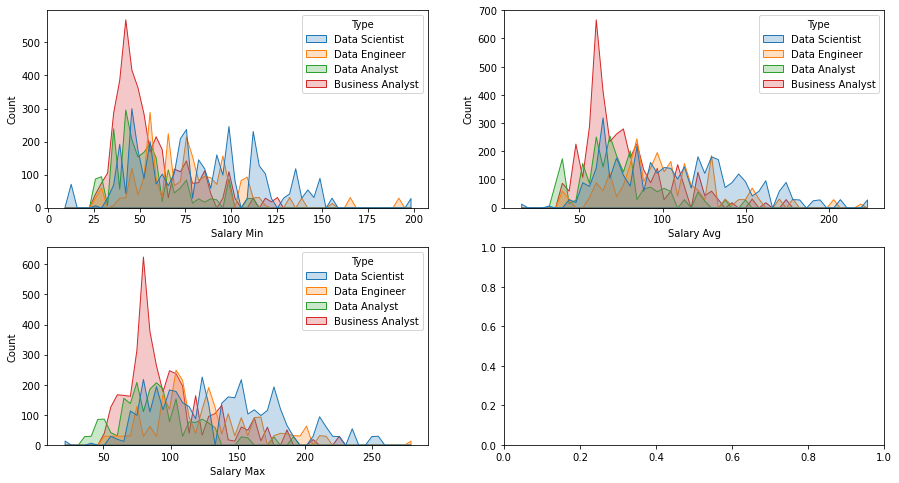

In [448]:
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
sns.histplot(data=data, x="Salary Min", hue='Type', element="poly", ax=axes[0,0])
sns.histplot(data=data, x="Salary Avg", hue='Type', element="poly", ax=axes[0,1])
sns.histplot(data=data, x="Salary Max", hue='Type', element="poly", ax=axes[1,0])

In [335]:
data.groupby(by='Type').mean()[['Salary Avg']]

,Salary Avg
Type,
Business Analyst,76.337488
Data Analyst,72.121279
Data Engineer,100.800435
Data Scientist,107.824728


### Step 1: 檢驗是否符合常態分布

In [42]:
avg_salary = {
    'ds': data[data['Type'] == 'Data Scientist'][['Salary Avg']],
    'de': data[data['Type'] == 'Data Engineer'][['Salary Avg']],
    'da': data[data['Type'] == 'Data Analyst'][['Salary Avg']],
    'ba': data[data['Type'] == 'Business Analyst'][['Salary Avg']]
}
            

In [43]:
print(
    'ds:', stat.shapiro(avg_salary['ds']),
    '\nde:', stat.shapiro(avg_salary['de']),
    '\nda:', stat.shapiro(avg_salary['da']),
    '\nba:', stat.shapiro(avg_salary['ba']),
)

ds: ShapiroResult(statistic=0.9713512063026428, pvalue=2.7560874098477765e-27) 
de: ShapiroResult(statistic=0.9558875560760498, pvalue=5.238764027000508e-27) 
da: ShapiroResult(statistic=0.9422292113304138, pvalue=8.446936744941085e-29) 
ba: ShapiroResult(statistic=0.8966472744941711, pvalue=0.0)


4 種職業類型的 P value 都小於 0.5 → 不符合常態分布 
### Step 2: 使用無母數分析的 Kruskal-Wallis H-test 進行檢定

In [44]:
stat.kruskal(avg_salary['ds'], avg_salary['de'], avg_salary['da'], avg_salary['ba'])

KruskalResult(statistic=2610.813346414662, pvalue=0.0)

因為檢定結果 P value = 0.0 < 0.05，所以代表 4 種職業類型的平均薪資有顯著的相異
### Step 3: Conover's test
做 multiple comparison，確認哪些職業類型之間真的存在差異

In [45]:
sp.posthoc_conover(data, val_col = 'Salary Avg', group_col = 'Type', p_adjust = 'holm')

,Business Analyst,Data Analyst,Data Engineer,Data Scientist
Business Analyst,1.000000e+00,2.137626e-06,6.884579e-265,0.000000
Data Analyst,2.137626e-06,1.000000e+00,1.857176e-263,0.000000
Data Engineer,6.884579e-265,1.857176e-263,1.000000e+00,0.000111
Data Scientist,0.000000e+00,0.000000e+00,1.107743e-04,1.000000


根據檢定的結果，可以發現每一組的 P value 都小於 0.05，代表都呈現顯著差異    
**因此就平均薪資而言， Data Scientist > Data Engineer > Business Analyst > Data Analyst**

## 哪些類別變數在各類型的職缺上平均薪資有顯著差異?
#### Company Size v.s Type on Avg Salary

In [68]:
obs = np.array(data[(data['Size']!='-1') & (data['Size']!='Unknown')].groupby(by=['Type', 'Size']).mean().unstack()['Salary Avg'])

In [73]:
stat.chi2_contingency(obs, correction = False)[1]

0.9999998211511135

#### Company Yealy Revenue v.s Type on Avg Salary

In [83]:
obs1 = np.array(data[(data['Revenue']!='-1') & (data['Revenue']!='Unknown')].groupby(by=['Type', 'Revenue']).mean().unstack()['Salary Avg'])

In [84]:
stat.chi2_contingency(obs1, correction = False)[1]

0.9999999955233392

#### Company Location State v.s Type on Avg Salary

In [121]:
df_LS = data.groupby(by=['Type', 'Location State']).mean().unstack()['Salary Avg'].fillna(0)

In [122]:
obs2 = np.array(df_LS)

In [87]:
stat.chi2_contingency(obs2, correction = False)[1]

0.0

公司所在的地區及不同職缺類型對平均薪資有顯著影響    
**不同職缺類型會受公司所在的洲別而有顯著差異嗎?**

In [123]:
obs2.shape

(4, 20)

In [124]:
states = df_LS.columns

In [117]:
print(
    "ds:", stat.chisquare(obs2[0,:].tolist())[1],
    "\nde:", stat.chisquare(obs2[1,:].tolist())[1],
    "\nda:", stat.chisquare(obs2[2,:].tolist())[1],
    "\nba:", stat.chisquare(obs2[3,:].tolist())[1],
)

ds: 4.7342126314974316e-172 
de: 9.39551565571576e-16 
da: 4.783504725117973e-231 
ba: 1.6271121779832435e-205


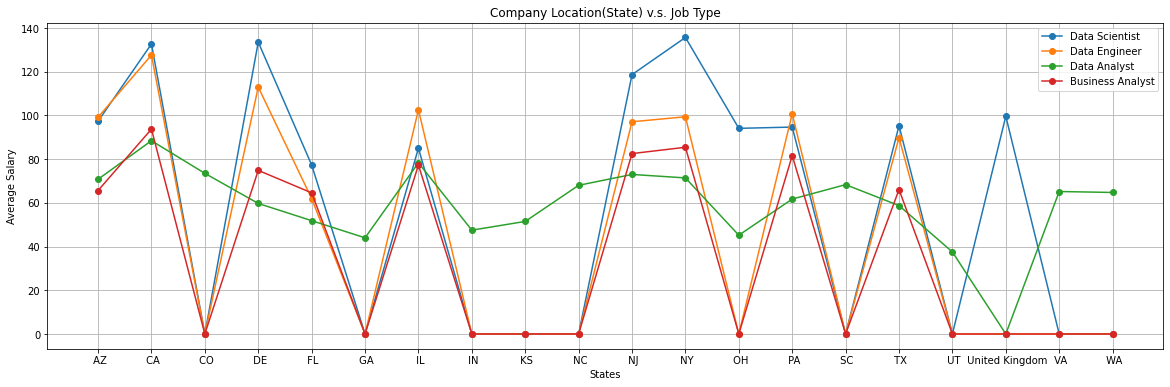

In [223]:
plt.figure(figsize=(20,6))
x = np.arange(len(states))
plt.plot(x, df_LS.iloc[3], label='Data Scientist', marker = "o")
plt.plot(x, df_LS.iloc[2], label='Data Engineer', marker = "o")
plt.plot(x, df_LS.iloc[1], label='Data Analyst', marker = "o")
plt.plot(x, df_LS.iloc[0], label='Business Analyst',marker = "o")
plt.grid(True)
plt.xticks(x, states)
plt.xlabel('States')
plt.ylabel('Average Salary')
plt.title('Company Location(State) v.s. Job Type')
plt.legend()
plt.show()

In [323]:
result_ls = pd.DataFrame(['1st', '2nd', '3rd'], columns=['Rank'])
result_ls['Data Scientist'] = df_LS.iloc[3].sort_values(ascending=False)[:3].index
result_ls['Data Engineer'] = df_LS.iloc[2].sort_values(ascending=False)[:3].index
result_ls['Data Analyst'] = df_LS.iloc[1].sort_values(ascending=False)[:3].index
result_ls['Business Analyst'] = df_LS.iloc[0].sort_values(ascending=False)[:3].index
result_ls

,Rank,Data Scientist,Data Engineer,Data Analyst,Business Analyst
0,1st,NY,CA,CA,CA
1,2nd,DE,DE,IL,NY
2,3rd,CA,IL,CO,NJ


#### Company Type of ownership v.s Type on Avg Salary

In [236]:
df_own = data[(data['Type of ownership']!='-1') & (data['Type of ownership']!='Unknown')].groupby(by=['Type', 'Type of ownership']).mean().unstack()['Salary Avg'].fillna(0)

In [237]:
obs3 = np.array(df_own)

In [238]:
stat.chi2_contingency(obs3, correction = False)[1]

1.4449779336354457e-12

#### 公司經營類型及不同職缺類型對平均薪資有顯著影響
哪個公司經營類型的各職缺平均薪資受到職缺類型影響較大?

In [239]:
obs3.shape

(4, 13)

In [240]:
own = df_own.columns

In [241]:
print(
    "ds:", stat.chisquare(obs3[0,:].tolist())[1],
    "\nde:", stat.chisquare(obs3[1,:].tolist())[1],
    "\nda:", stat.chisquare(obs3[2,:].tolist())[1],
    "\nba:", stat.chisquare(obs3[3,:].tolist())[1],
)

ds: 0.9820690689190785 
de: 0.7358142109292833 
da: 7.97543760826757e-23 
ba: 0.9873767782436176


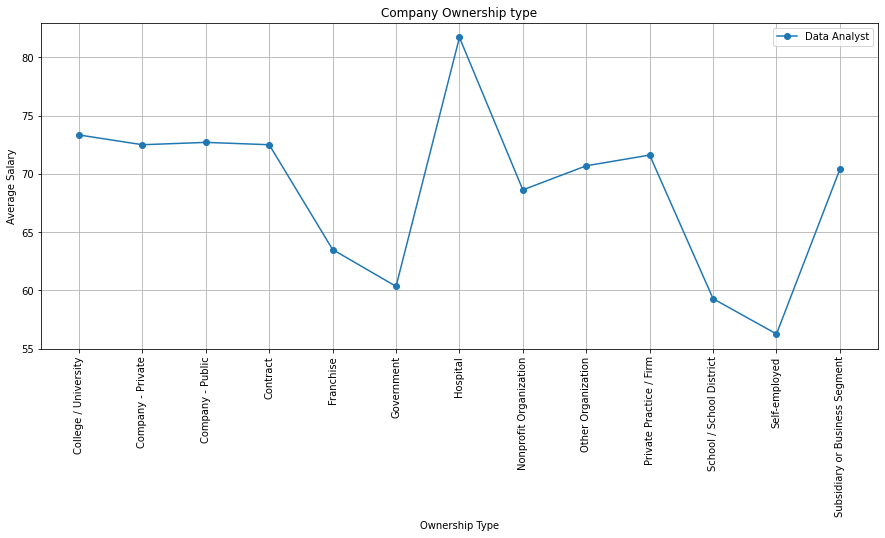

In [325]:
plt.figure(figsize=(15,6))
x = np.arange(len(own))
plt.plot(x, obs3[1,:], label='Data Analyst', marker = "o")
plt.grid(True)
plt.xticks(x, own, rotation=90)
plt.xlabel('Ownership Type')
plt.ylabel('Average Salary')
plt.title('Company Ownership type')
plt.legend()
plt.show()

#### Company Easy Apply v.s Type on Avg Salary

In [92]:
obs4 = np.array(data.groupby(by=['Type', 'Easy Apply']).mean().unstack()['Salary Avg'].fillna(0))

In [93]:
stat.chi2_contingency(obs4, correction = False)[1]

0.9109100878827214

#### Sector v.s. Type on Avg Salary

In [269]:
df_sector = data[data['Sector'] != '-1'].groupby(by=['Type', 'Sector']).mean()['Salary Avg'].unstack().fillna(0)

In [270]:
obs5 = np.array(df_sector)

In [271]:
stat.chi2_contingency(obs5, correction = False)[1]

7.919111403193165e-11

公司所屬產業及不同職缺類型對平均薪資有顯著影響
#### 不同職缺類型會受公司所屬產業而有顯著差異嗎?

In [272]:
obs5.shape

(4, 25)

In [273]:
sector = df_sector.columns

In [274]:
print(
    "ds:", stat.chisquare(obs5[0,:].tolist())[1],
    "\nde:", stat.chisquare(obs5[1,:].tolist())[1],
    "\nda:", stat.chisquare(obs5[2,:].tolist())[1],
    "\nba:", stat.chisquare(obs5[3,:].tolist())[1],
)

ds: 0.9880208660144963 
de: 9.881186172571497e-09 
da: 3.1330154377209412e-15 
ba: 0.9425928824547896


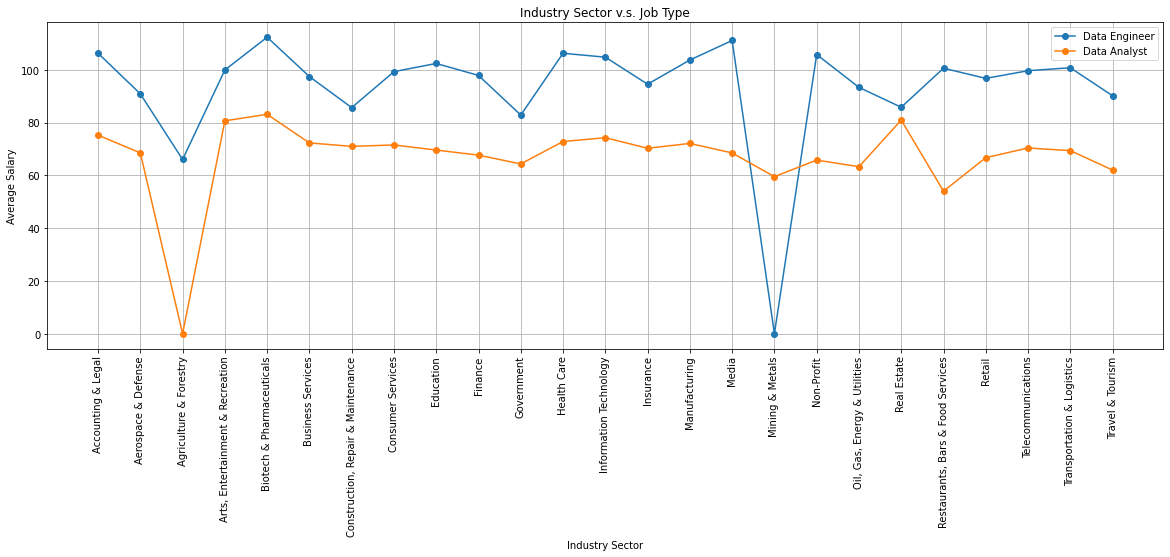

In [326]:
plt.figure(figsize=(20,6))
x = np.arange(len(sector))
plt.plot(x, df_sector.iloc[2], label='Data Engineer', marker = "o")
plt.plot(x, df_sector.iloc[1], label='Data Analyst', marker = "o")
plt.grid(True)
plt.xticks(x, sector, rotation=90)
plt.xlabel('Industry Sector')
plt.ylabel('Average Salary')
plt.title('Industry Sector v.s. Job Type')
plt.legend()
plt.show()

#### Industry v.s. Type on Avg Salary

In [287]:
df_indus = data[data['Industry'] != '-1'].groupby(by=['Type','Industry']).mean()['Salary Avg'].unstack().fillna(0)

In [288]:
obs6 = np.array(df_indus)

In [289]:
stat.chi2_contingency(obs6, correction = False)[1]

0.0

公司所屬產業及不同職缺類型對平均薪資有顯著影響
#### 不同職缺類型會受公司所屬產業而有顯著差異嗎?

In [290]:
obs6.shape

(4, 112)

In [291]:
industry = df_indus.columns

In [292]:
print(
    "ds:", stat.chisquare(obs6[0,:].tolist())[1],
    "\nde:", stat.chisquare(obs6[1,:].tolist())[1],
    "\nda:", stat.chisquare(obs6[2,:].tolist())[1],
    "\nba:", stat.chisquare(obs6[3,:].tolist())[1],
)

ds: 7.8121260671477545e-177 
de: 0.0 
da: 0.0 
ba: 0.0


# 2. 公司相關欄位
### (1) 公司營收
各公司營收區間的薪資範圍/平均薪資是否有顯著差異?

#### Step 1: 檢驗是否符合常態分布

In [347]:
data['Revenue'].unique()

array(['Unknown / Non-Applicable', '$100 to $500 million (USD)',
       '$500 million to $1 billion (USD)', '$10+ billion (USD)',
       '$25 to $50 million (USD)', '$1 to $5 million (USD)',
       '$5 to $10 billion (USD)', '-1', '$5 to $10 million (USD)',
       '$50 to $100 million (USD)', '$1 to $2 billion (USD)',
       '$2 to $5 billion (USD)', 'Less than $1 million (USD)',
       '$10 to $25 million (USD)'], dtype=object)

In [348]:
data_3 = data[~((data['Revenue'] == '-1') | (data['Revenue'] == 'Unknown / Non-Applicable'))]

In [349]:
revenues = ['Less than $1 million (USD)', '$1 to $5 million (USD)', '$5 to $10 million (USD)',
    '$10 to $25 million (USD)', '$25 to $50 million (USD)',
    '$50 to $100 million (USD)', '$100 to $500 million (USD)', 
    '$500 million to $1 billion (USD)','$1 to $2 billion (USD)',
    '$2 to $5 billion (USD)', '$5 to $10 billion (USD)', '$10+ billion (USD)']

In [358]:
revenue_li = []
for revenue in revenues:
    temp = data_3[data_3['Revenue'] == revenue]['Salary Avg']
    revenue_li.append(temp)
    print(revenue, ":", stat.shapiro(temp))

Less than $1 million (USD) : ShapiroResult(statistic=0.9280900955200195, pvalue=1.864311791966236e-13)
$1 to $5 million (USD) : ShapiroResult(statistic=0.9464232325553894, pvalue=1.9996940843654276e-13)
$5 to $10 million (USD) : ShapiroResult(statistic=0.9237006306648254, pvalue=1.0077673287881006e-12)
$10 to $25 million (USD) : ShapiroResult(statistic=0.9170284271240234, pvalue=4.263647408195058e-19)
$25 to $50 million (USD) : ShapiroResult(statistic=0.9254246950149536, pvalue=2.9684600508771977e-16)
$50 to $100 million (USD) : ShapiroResult(statistic=0.9266104102134705, pvalue=3.835942654170262e-21)
$100 to $500 million (USD) : ShapiroResult(statistic=0.941825270652771, pvalue=8.993740323987828e-22)
$500 million to $1 billion (USD) : ShapiroResult(statistic=0.925538957118988, pvalue=3.0297482188010316e-13)
$1 to $2 billion (USD) : ShapiroResult(statistic=0.9415716528892517, pvalue=9.797113749605846e-14)
$2 to $5 billion (USD) : ShapiroResult(statistic=0.9097744226455688, pvalue=1.743

P value 都小於 0.5 → 不符合常態分布 
#### Step 2: 使用無母數分析的 Kruskal-Wallis H-test 進行檢定

In [359]:
stat.kruskal(*revenue_li)

KruskalResult(statistic=63.74890730754689, pvalue=1.8510920054954307e-09)

因為檢定結果 P value = 0.0 < 0.05，所以代表不同營收的公司的平均薪資有顯著的相異
#### Step 3: Conover's test
做 multiple comparison，確認哪些不同營收的公司之間的平均薪資真的存在差異

In [360]:
sp.posthoc_conover(data_3, val_col = 'Salary Avg', group_col = 'Revenue', p_adjust = 'holm')

,$1 to $2 billion (USD),$1 to $5 million (USD),$10 to $25 million (USD),$10+ billion (USD),$100 to $500 million (USD),$2 to $5 billion (USD),$25 to $50 million (USD),$5 to $10 billion (USD),$5 to $10 million (USD),$50 to $100 million (USD),$500 million to $1 billion (USD),Less than $1 million (USD)
$1 to $2 billion (USD),1.000000,1.000000,1.000000,6.819790e-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000
$1 to $5 million (USD),1.000000,1.000000,1.000000,1.000000e+00,1.000000,0.358461,1.000000,1.000000,1.000000,2.268649e-02,0.165607,1.000000
$10 to $25 million (USD),1.000000,1.000000,1.000000,1.000000e+00,1.000000,0.491944,1.000000,1.000000,1.000000,2.820903e-02,0.231578,1.000000
$10+ billion (USD),0.068198,1.000000,1.000000,1.000000e+00,0.011692,0.000028,0.386277,1.000000,1.000000,8.224788e-09,0.000100,1.000000
$100 to $500 million (USD),1.000000,1.000000,1.000000,1.169206e-02,1.000000,1.000000,1.000000,1.000000,1.000000,2.575384e-01,1.000000,1.000000
$2 to $5 billion (USD),1.000000,0.358461,0.491944,2.773740e-05,1.000000,1.000000,1.000000,0.691769,1.000000,1.000000e+00,1.000000,1.000000
$25 to $50 million (USD),1.000000,1.000000,1.000000,3.862768e-01,1.000000,1.000000,1.000000,1.000000,1.000000,6.280281e-01,1.000000,1.000000
$5 to $10 billion (USD),1.000000,1.000000,1.000000,1.000000e+00,1.000000,0.691769,1.000000,1.000000,1.000000,7.798540e-02,0.315319,1.000000
$5 to $10 million (USD),1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,3.503259e-01,0.790036,1.000000
$50 to $100 million (USD),1.000000,0.022686,0.028209,8.224788e-09,0.257538,1.000000,0.628028,0.077985,0.350326,1.000000e+00,1.000000,0.680836


In [361]:
data_3.groupby(by=['Revenue']).mean()[['Salary Min']]

,Salary Min
Revenue,
$1 to $2 billion (USD),65.517556
$1 to $5 million (USD),67.304850
$10 to $25 million (USD),67.508580
$10+ billion (USD),70.543363
$100 to $500 million (USD),66.101740
$2 to $5 billion (USD),63.970801
$25 to $50 million (USD),65.541431
$5 to $10 billion (USD),68.562929
$5 to $10 million (USD),67.809264


### (2) 公司規模
各公司規模的薪資範圍/平均薪資是否有顯著差異?

#### Step 1: 檢驗是否符合常態分布

In [337]:
data['Size'].unique()

array(['501 to 1000 employees', '1001 to 5000 employees',
       '1 to 50 employees', '201 to 500 employees', '51 to 200 employees',
       '10000+ employees', '5001 to 10000 employees', 'Unknown', '-1'],
      dtype=object)

In [338]:
data_2 = data[~((data['Size'] == '-1') | (data['Size'] == 'Unknown'))]

In [339]:
sizes = ['1 to 50 employees', '51 to 200 employees', '201 to 500 employees', '501 to 1000 employees', '1001 to 5000 employees', 
    '5001 to 10000 employees', '10000+ employees']

In [344]:
size_li = []
for size in sizes:
    temp= data_2[data_2['Size'] == size]['Salary Avg']
    size_li.append(temp)
    print(size, ":", stat.shapiro(temp))

1 to 50 employees : ShapiroResult(statistic=0.9398243427276611, pvalue=3.5572798133911065e-26)
51 to 200 employees : ShapiroResult(statistic=0.9398390650749207, pvalue=9.980894806662447e-29)
201 to 500 employees : ShapiroResult(statistic=0.928780734539032, pvalue=9.378491200855782e-25)
501 to 1000 employees : ShapiroResult(statistic=0.9477962255477905, pvalue=5.120422733607643e-19)
1001 to 5000 employees : ShapiroResult(statistic=0.9301937222480774, pvalue=1.2647845255525562e-29)
5001 to 10000 employees : ShapiroResult(statistic=0.9307330846786499, pvalue=3.788117952067423e-17)
10000+ employees : ShapiroResult(statistic=0.93528151512146, pvalue=3.982261517873019e-33)


P value 都小於 0.5 → 不符合常態分布 
#### Step 2: 使用無母數分析的 Kruskal-Wallis H-test 進行檢定

In [346]:
stat.kruskal(*size_li)

KruskalResult(statistic=10.306778721710122, pvalue=0.11231329826789409)

因為檢定結果 P value = 0.11 > 0.05，所以代表各種公司規模的的平均薪資沒有顯著的相異

### (3) 公司所在洲別
不同公司所在的洲別的薪資範圍/平均薪資是否有顯著差異?

#### Step 1: 檢驗是否符合常態分布

In [362]:
data['Location State'].unique()

array([' NY', ' NJ', ' CA', ' IL', ' TX', ' AZ', ' DE', ' PA',
       ' United Kingdom', ' FL', ' OH', ' UT', ' VA', ' NC', ' SC', ' IN',
       ' WA', ' GA', ' KS', ' CO'], dtype=object)

In [339]:
states = data['Location State'].unique()

In [363]:
state_li = []
for state in states:
    temp= data[data['Location State'] == state]['Salary Avg']
    state_li.append(temp)
    print(state, ":", stat.shapiro(temp))

 AZ : ShapiroResult(statistic=0.9591535925865173, pvalue=1.9013420564817796e-15)
 CA : ShapiroResult(statistic=0.9798831343650818, pvalue=2.863964438896932e-21)
 CO : ShapiroResult(statistic=0.8575829863548279, pvalue=3.728099073896374e-08)
 DE : ShapiroResult(statistic=0.7909611463546753, pvalue=7.074706154241994e-09)
 FL : ShapiroResult(statistic=0.9451960921287537, pvalue=2.0094899526377878e-14)
 GA : ShapiroResult(statistic=1.0, pvalue=1.0)
 IL : ShapiroResult(statistic=0.9105870127677917, pvalue=2.0641328529556206e-24)
 IN : ShapiroResult(statistic=1.0, pvalue=1.0)
 KS : ShapiroResult(statistic=1.0, pvalue=1.0)
 NC : ShapiroResult(statistic=0.8546146154403687, pvalue=7.034276450212928e-08)
 NJ : ShapiroResult(statistic=0.9460515379905701, pvalue=1.4885135612985323e-07)
 NY : ShapiroResult(statistic=0.9290285110473633, pvalue=2.1024766284338547e-22)
 OH : ShapiroResult(statistic=0.8582639694213867, pvalue=4.072271220321305e-13)
 PA : ShapiroResult(statistic=0.8797702193260193, pval

C:\Users\Police\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


P value 都小於 0.5 → 不符合常態分布 
#### Step 2: 使用無母數分析的 Kruskal-Wallis H-test 進行檢定

In [367]:
stat.kruskal(*state_li)

KruskalResult(statistic=2121.569663976547, pvalue=0.0)

因為檢定結果 P value = 0.0 < 0.05，所以代表不同洲別的公司的平均薪資有顯著的相異
#### Step 3: Conover's test
做 multiple comparison，確認哪些不同洲別的公司之間的平均薪資真的存在差異

In [368]:
sp.posthoc_conover(data, val_col = 'Salary Avg', group_col = 'Location State', p_adjust = 'holm')

,AZ,CA,CO,DE,FL,GA,IL,IN,KS,NC,NJ,NY,OH,PA,SC,TX,UT,United Kingdom,VA,WA
AZ,1.000000e+00,4.916244e-89,4.329250e-01,1.000000e+00,4.151424e-40,0.127333,1.000000e+00,2.136472e-11,0.851914,5.641978e-05,1.000000e+00,6.601580e-19,1.000000e+00,1.000000e+00,1.0,1.759466e-03,7.859417e-20,1.000000,1.457580e-05,1.111250e-05
CA,4.916244e-89,1.000000e+00,3.297344e-22,1.594179e-09,6.772368e-235,0.000286,1.417284e-87,3.393872e-26,0.012390,3.709461e-32,8.327405e-22,6.811299e-20,7.727561e-19,6.377253e-74,1.0,0.000000e+00,1.050584e-42,1.000000,5.845974e-24,1.829221e-25
CO,4.329250e-01,3.297344e-22,1.000000e+00,1.000000e+00,2.140278e-02,0.840914,1.245046e-01,7.356305e-06,1.000000,1.000000e+00,2.095103e-01,1.841226e-09,1.386006e-01,9.416868e-02,1.0,1.000000e+00,3.985171e-10,1.000000,5.242996e-01,6.475650e-01
DE,1.000000e+00,1.594179e-09,1.000000e+00,1.000000e+00,7.746586e-06,0.207917,1.000000e+00,2.817010e-08,1.000000,9.654536e-02,1.000000e+00,1.285984e-02,1.000000e+00,1.000000e+00,1.0,1.000000e+00,2.327872e-13,1.000000,6.740074e-03,7.919419e-03
FL,4.151424e-40,6.772368e-235,2.140278e-02,7.746586e-06,1.000000e+00,1.000000,3.323287e-47,6.506762e-03,1.000000,1.000000e+00,1.376766e-21,5.721194e-108,2.137086e-21,1.342037e-45,1.0,5.453206e-35,2.581329e-06,1.000000,1.000000e+00,1.000000e+00
GA,1.273333e-01,2.862107e-04,8.409137e-01,2.079169e-01,1.000000e+00,1.000000,9.895326e-02,1.000000e+00,1.000000,1.000000e+00,9.228507e-02,6.003362e-03,8.149864e-02,9.353383e-02,1.0,3.337780e-01,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
IL,1.000000e+00,1.417284e-87,1.245046e-01,1.000000e+00,3.323287e-47,0.098953,1.000000e+00,4.485526e-12,0.708346,6.765961e-06,1.000000e+00,2.482714e-16,1.000000e+00,1.000000e+00,1.0,1.238846e-06,6.495509e-21,1.000000,2.965247e-06,2.081381e-06
IN,2.136472e-11,3.393872e-26,7.356305e-06,2.817010e-08,6.506762e-03,1.000000,4.485526e-12,1.000000e+00,1.000000,2.119628e-03,1.412398e-11,9.162048e-19,8.502509e-12,3.183564e-12,1.0,2.812134e-09,1.000000e+00,0.143336,1.963253e-01,1.185204e-01
KS,8.519144e-01,1.239000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,7.083458e-01,1.000000e+00,1.000000,1.000000e+00,6.593664e-01,1.020839e-01,6.078861e-01,6.733831e-01,1.0,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
NC,5.641978e-05,3.709461e-32,1.000000e+00,9.654536e-02,1.000000e+00,1.000000,6.765961e-06,2.119628e-03,1.000000,1.000000e+00,5.937904e-05,1.020833e-16,3.409918e-05,4.524364e-06,1.0,1.873480e-02,2.154409e-06,1.000000,1.000000e+00,1.000000e+00


In [383]:
state_df = data[data['Location State'] != ' United Kingdom'].groupby(by=['Location State']).mean()[['Salary Avg']].sort_values(by='Salary Avg', ascending=False)

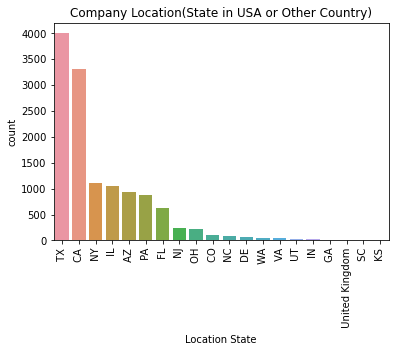

In [414]:
plt.title('Company Location(State in USA or Other Country)')
sns.countplot(x = "Location State", data=data, order = data['Location State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

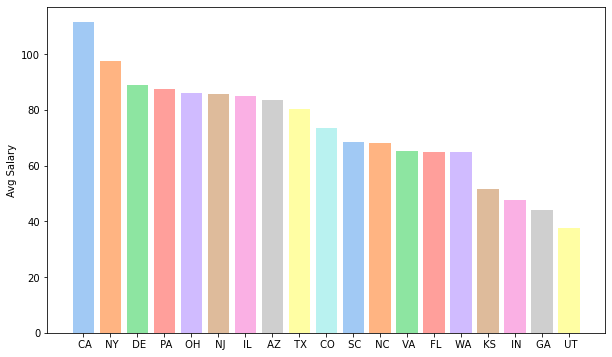

In [386]:
plt.figure(figsize=(10,6))
states = state_df.index
x = np.arange(len(states))
plt.bar(x, state_df['Salary Avg'], color=sns.color_palette('pastel'))
plt.xticks(x, states)
plt.ylabel('Avg Salary')
plt.show()

### (4) Type of Ownership
各經營型態的企業的薪資範圍/平均薪資是否有顯著差異?
#### Step 1: 檢驗是否符合常態分布

In [388]:
data['Type of ownership'].unique()

array(['Company - Private', 'Unknown', 'Company - Public',
       'Nonprofit Organization', '-1', 'Government', 'Hospital',
       'Self-employed', 'Subsidiary or Business Segment', 'Contract',
       'School / School District', 'Private Practice / Firm',
       'College / University', 'Franchise', 'Other Organization'],
      dtype=object)

In [389]:
data_4 = data[~((data['Type of ownership'] == '-1') | (data['Type of ownership'] == 'Unknown'))]

In [401]:
owners = data_4['Type of ownership'].unique()

In [402]:
owner_li = []
for owner in owners:
    temp= data_4[data_4['Type of ownership'] == owner]['Salary Avg']
    owner_li.append(temp)
    print(owner, ":", stat.shapiro(temp))

Company - Private : ShapiroResult(statistic=0.9364795088768005, pvalue=0.0)
Company - Public : ShapiroResult(statistic=0.9406883120536804, pvalue=9.743699076671087e-35)
Nonprofit Organization : ShapiroResult(statistic=0.9444653391838074, pvalue=9.125740527832216e-13)
Government : ShapiroResult(statistic=0.8852831125259399, pvalue=1.4342341333670183e-12)
Hospital : ShapiroResult(statistic=0.9024996757507324, pvalue=9.953890548786148e-05)
Self-employed : ShapiroResult(statistic=0.9576897025108337, pvalue=0.7425735592842102)
Subsidiary or Business Segment : ShapiroResult(statistic=0.9296578764915466, pvalue=1.497627624974659e-15)
Contract : ShapiroResult(statistic=0.864932119846344, pvalue=4.815042302652728e-06)
School / School District : ShapiroResult(statistic=0.8269585371017456, pvalue=0.0008408675785176456)
Private Practice / Firm : ShapiroResult(statistic=0.9159262180328369, pvalue=0.007407695520669222)
College / University : ShapiroResult(statistic=0.926182210445404, pvalue=1.701955

P value 都小於 0.5 → 不符合常態分布 
#### Step 2: 使用無母數分析的 Kruskal-Wallis H-test 進行檢定

In [404]:
stat.kruskal(*owner_li)

KruskalResult(statistic=81.18522444049927, pvalue=2.451219027759327e-12)

因為檢定結果 P value < 0.05，所以代表不同經營型態的公司的平均薪資有顯著的相異
#### Step 3: Conover's test
做 multiple comparison，確認哪些不同經營型態的公司之間的平均薪資真的存在差異

In [408]:
sp.posthoc_conover(data_4, val_col = 'Salary Avg', group_col = 'Type of ownership', p_adjust = 'holm')

,College / University,Company - Private,Company - Public,Contract,Franchise,Government,Hospital,Nonprofit Organization,Other Organization,Private Practice / Firm,School / School District,Self-employed,Subsidiary or Business Segment
College / University,1.000000,0.322218,5.886557e-03,1.000000,1.0,1.000000e+00,1.0,1.000000,1.0,1.0,1.0,1.0,0.570970
Company - Private,0.322218,1.000000,1.089916e-03,1.000000,1.0,4.220066e-04,1.0,0.020473,1.0,1.0,1.0,1.0,1.000000
Company - Public,0.005887,0.001090,1.000000e+00,0.295126,1.0,4.218542e-07,1.0,0.000005,1.0,1.0,1.0,1.0,1.000000
Contract,1.000000,1.000000,2.951256e-01,1.000000,1.0,1.000000e+00,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000
Franchise,1.000000,1.000000,1.000000e+00,1.000000,1.0,1.000000e+00,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000
Government,1.000000,0.000422,4.218542e-07,1.000000,1.0,1.000000e+00,1.0,1.000000,1.0,1.0,1.0,1.0,0.004649
Hospital,1.000000,1.000000,1.000000e+00,1.000000,1.0,1.000000e+00,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000
Nonprofit Organization,1.000000,0.020473,4.771900e-06,1.000000,1.0,1.000000e+00,1.0,1.000000,1.0,1.0,1.0,1.0,0.261108
Other Organization,1.000000,1.000000,1.000000e+00,1.000000,1.0,1.000000e+00,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000
Private Practice / Firm,1.000000,1.000000,1.000000e+00,1.000000,1.0,1.000000e+00,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000


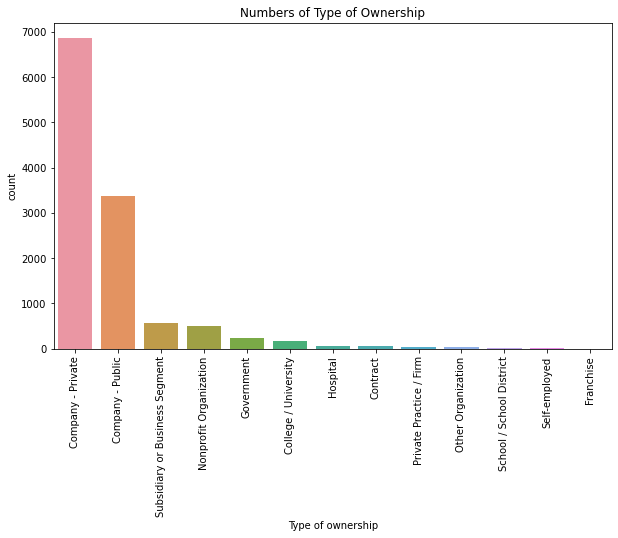

In [442]:
plt.figure(figsize=(10,6))
plt.title('Numbers of Type of Ownership')
sns.countplot(x = "Type of ownership", data=data_4, order = data_4['Type of ownership'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [415]:
owner_df = data_4.groupby(by=['Type of ownership']).mean()[['Salary Avg']].sort_values(by='Salary Avg', ascending=False)

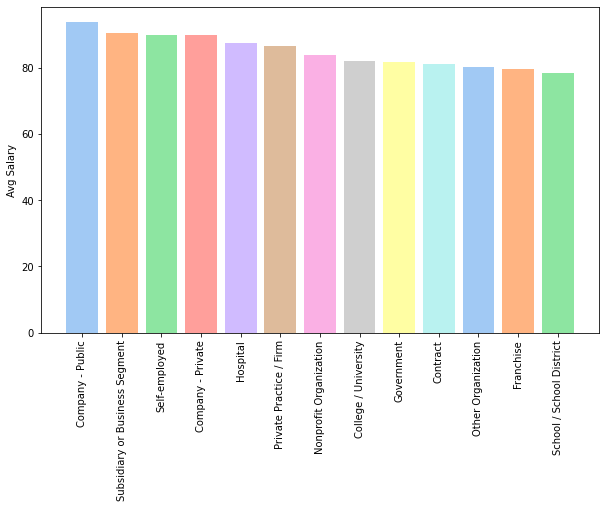

In [417]:
plt.figure(figsize=(10,6))
own = owner_df.index
x = np.arange(len(own))
plt.bar(x, owner_df['Salary Avg'], color=sns.color_palette('pastel'))
plt.xticks(x, own, rotation=90)
plt.ylabel('Avg Salary')
plt.show()

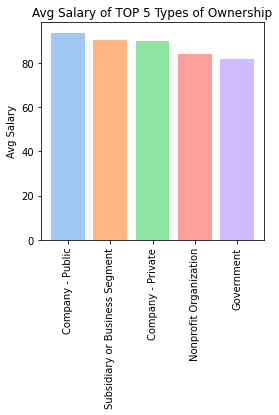

In [445]:
own_1 = ['Company - Public', 'Subsidiary or Business Segment','Company - Private', 'Nonprofit Organization','Government']
plt.figure(figsize=(4,4))
own = owner_df.loc[own_1].index
x = np.arange(len(own))
plt.title('Avg Salary of TOP 5 Types of Ownership')
plt.bar(x, owner_df.loc[own_1]['Salary Avg'], color=sns.color_palette('pastel'))
plt.xticks(x, own, rotation=90)
plt.ylabel('Avg Salary')
plt.show()

# Q3 連續型變數

In [329]:
continuous_cols = ['Rating', 'Period', 'Competitors Count', 'Salary Avg']

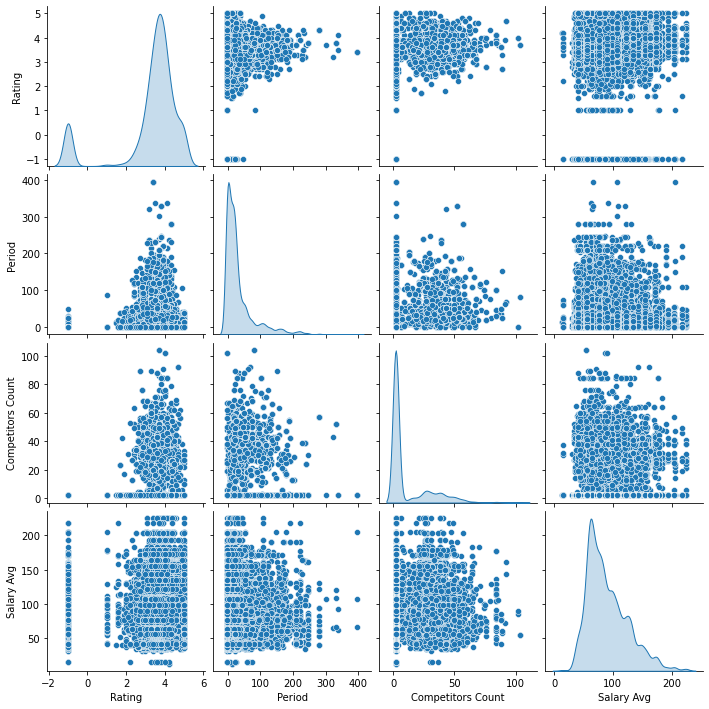

In [330]:
sns.pairplot(data=data[continuous_cols], diag_kind='kde')

<AxesSubplot:>

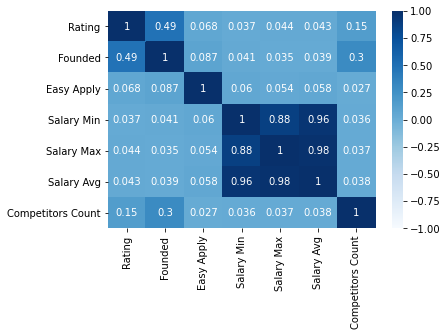

In [30]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap='Blues', annot=True)